In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import random
import matplotlib.pyplot as plt

In [2]:
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Close']

rt = data.pct_change().dropna()

mu = rt.mean().values
sigma = rt.std().values
last_price = data.iloc[-1].values

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
def simulate_price(mu: int | float, sigma: int | float, last_price: int | float, n_sims: int, n_days: int):
    """
    mu y sigma diarios
    """
    Z = np.random.normal(size=(n_sims, n_days))
    returns = mu + sigma * Z
    cumulative_returns = (returns + 1).cumprod(axis=1)
    sim_prices = last_price * cumulative_returns
    return sim_prices

def plot_simulations(sim_prices):
    plt.figure(figsize=(10, 6))
    plt.plot(sim_prices.T)
    plt.title('Simulated Price Paths')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()

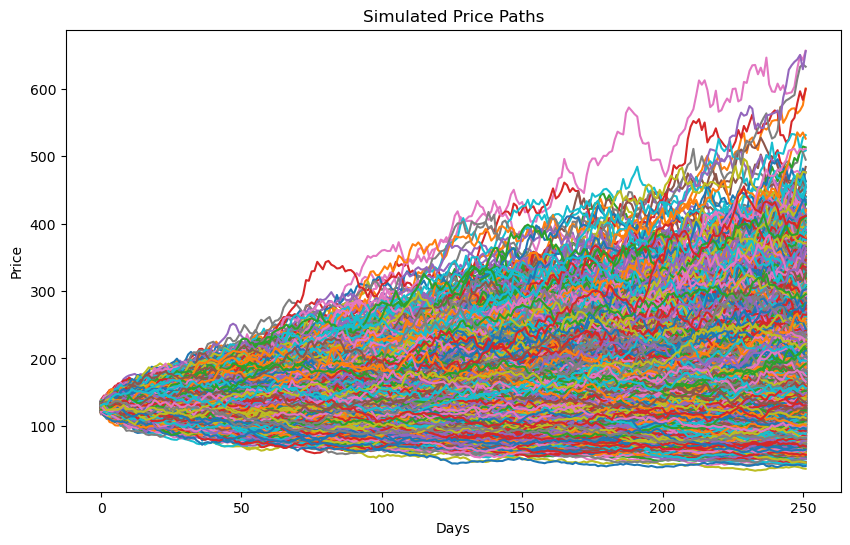

In [4]:
prices = simulate_price(mu, sigma, last_price, 10_000, 252)
plot_simulations(prices)

In [7]:
prices[:, -1].mean()

165.35606145135657